# RENSA cipher analysis

In [16]:
import numpy as np
import matplotlib.pyplot as plt

bytelist = np.arange(256)

def freq_stats(filepath):
    res = np.zeros(256)
    with open(filepath, "rb") as f:
        curr = f.read(1)
        while curr:
            res[curr[0]] += 1
            curr = f.read(1)
    return res / sum(res)

## Keys

In this research we will use three different keys:

- Default key (DK): consists of 256 incrementing bytes (0, 1, 2, ..., 255)
- Low entropy key (LEK): consists of 256 first characters of _lorem ipsum_ text
- High entropy key (HEK): consists of 256 randomly generated bytes

Here are the entropy values for these keys respectively:

In [6]:
%%bash
cat test/DK | ./entropy
cat test/LEK | ./entropy
cat test/HEK | ./entropy

8.000000
4.253401
7.246746


## Text file

File: 6.2 MiB English text.

In [7]:
%%bash
cat test/big.txt | ./entropy

4.511148


In [8]:
%%bash
# encrypt with default key
./rensa -i test/big.txt -o test/big.txt.rensa_d
cat test/big.txt.rensa_d | ./entropy

6.204891


In [11]:
%%bash
# encrypt with low entropy key (text)
./rensa -i test/big.txt -o test/big.txt.rensa_l -k test/LEK
cat test/big.txt.rensa_l | ./entropy

5.896008


In [12]:
%%bash
# encrypt with high entropy key
./rensa -i test/big.txt -o test/big.txt.rensa_h -k test/HEK
cat test/big.txt.rensa_h | ./entropy

7.115868


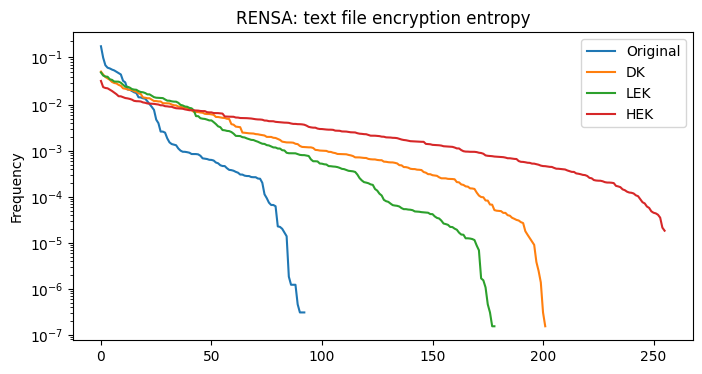

In [39]:
stats_o = freq_stats("test/big.txt")
stats_d = freq_stats("test/big.txt.rensa_d")
stats_l = freq_stats("test/big.txt.rensa_l")
stats_h = freq_stats("test/big.txt.rensa_h")

plt.figure(figsize=(8, 4))
plt.plot(bytelist, np.sort(stats_o)[::-1], label='Original')
plt.plot(bytelist, np.sort(stats_d)[::-1], label='DK')
plt.plot(bytelist, np.sort(stats_l)[::-1], label='LEK')
plt.plot(bytelist, np.sort(stats_h)[::-1], label='HEK')

plt.ylabel('Frequency')
plt.yscale('logit')
plt.title('RENSA: text file encryption entropy')

plt.legend()

plt.show()

## Multimedia file

File: 98 MiB MP4 video.

In [40]:
%%bash
cat test/test.mp4 | ./entropy

7.905840


In [41]:
%%bash
# encrypt with default key
./rensa -i test/test.mp4 -o test/test.mp4.rensa_d
cat test/test.mp4.rensa_d | ./entropy

7.997809


In [42]:
%%bash
# encrypt with low entropy key (text)
./rensa -i test/test.mp4 -o test/test.mp4.rensa_l -k test/LEK
cat test/test.mp4.rensa_l | ./entropy

7.984923


In [43]:
%%bash
# encrypt with high entropy key
./rensa -i test/test.mp4 -o test/test.mp4.rensa_h -k test/HEK
cat test/test.mp4.rensa_h | ./entropy

7.997455


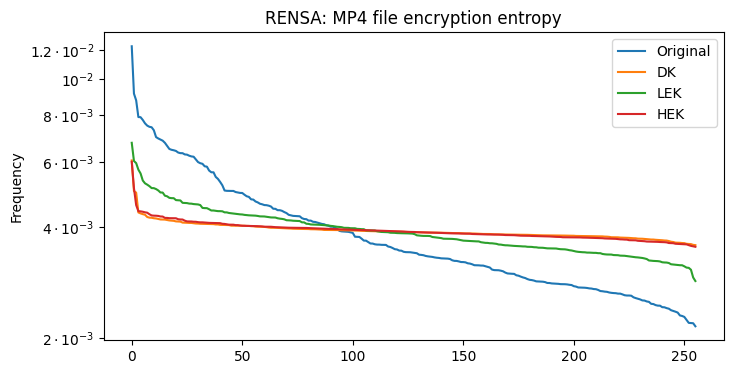

In [44]:
stats_o = freq_stats("test/test.mp4")
stats_d = freq_stats("test/test.mp4.rensa_d")
stats_l = freq_stats("test/test.mp4.rensa_l")
stats_h = freq_stats("test/test.mp4.rensa_h")

plt.figure(figsize=(8, 4))
plt.plot(bytelist, np.sort(stats_o)[::-1], label='Original')
plt.plot(bytelist, np.sort(stats_d)[::-1], label='DK')
plt.plot(bytelist, np.sort(stats_l)[::-1], label='LEK')
plt.plot(bytelist, np.sort(stats_h)[::-1], label='HEK')

plt.ylabel('Frequency')
plt.yscale('logit')
plt.title('RENSA: MP4 file encryption entropy')

plt.legend()

plt.show()